<img src="../assets/blocks_animation_v3.gif" align="center" width="100%" margin="0" ></img> 
<br>

# `DEMOLITION PREMONITION`
# - 
##### `by Samuel He`
---
## 05 Modelling
---

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import time
from random import randint
import datetime as dt
from math import sin, cos, sqrt, atan2, radians
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
# from matplotlib.lines import Line2D
#Creates Hi-Res PLT Plots
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# MACHINE LEARNING LIBRARIES
from sklearn.impute import SimpleImputer
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report,roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,BaggingClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold, RandomizedSearchCV
from sklearn.naive_bayes import MultinomialNB
from imblearn.over_sampling import SMOTE

from xgboost import XGBClassifier
from xgboost import plot_importance


# from onemapsg import OneMapClient
# from geopy.distance import lonlat, distance
# import geopandas as gpd
# from geopandas import GeoSeries, GeoDataFrame
# from geopy.distance import geodesic
# import shapely
# from shapely import geometry
# from shapely import ops
# from shapely.geometry import Point, LineString, Polygon, MultiPoint, shape,mapping
# from shapely.ops import nearest_points
# from shapely.geometry import Point
#Uncomment to download Geopandas
#!pip3 install --upgrade --target=/Users/samuelhe/opt/anaconda3/lib/python3.7/site-packages geopandas
#Uncomment to download imblearn
#!pip3 install --upgrade --target=/Users/samuelhe/opt/anaconda3/lib/python3.7/site-packages imblearn

Using TensorFlow backend.


### 5.1 Preparing our data for modelling
Our blocks data still has features that need to be dropped. They are namely specific location features like latitude and longitude and location names as these features will encourage overfitting. We then need to create dummy columns for our categorical features and split the data set into our training set and our unseen test set.

In [2]:
# READING IN THE DATA
all_blocks = pd.read_csv("../data/all_blocks_23_apr_2am.csv")
all_blocks.head(2)

,latest_survival_date,year_completed,blk_no,street,max_floor_lvl,bldg_contract_town,total_dwelling_units,1room_sold,2room_sold,3room_sold,...,dist_to_airfield,airfield,height_score_2020,density_500m,units_per_floor,est_land_use,is_point_block,nearest_train_stn,dist_to_train_stn,dist_to_city_centre
0,1995-08-22,1952.0,2,boon tiong rd / tiong bahru rd,4,bm,24.0,0.0,0.0,24.0,...,12139,paya lebar air base,-10.38,125,6.0,375.0,0,TIONG BAHRU MRT STATION,198,2535
1,1995-08-22,1952.0,16,boon tiong rd / tiong bahru rd,4,bm,24.0,0.0,0.0,24.0,...,12024,paya lebar air base,-8.93,126,6.0,375.0,0,TIONG BAHRU MRT STATION,303,2450


In [3]:
# LOOKING AT OUR DATA TYPES AND DOUBLE-CHECKING IF NULLS EXIST
all_blocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10356 entries, 0 to 10355
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   latest_survival_date  10356 non-null  object 
 1   year_completed        10356 non-null  float64
 2   blk_no                10356 non-null  object 
 3   street                10356 non-null  object 
 4   max_floor_lvl         10356 non-null  int64  
 5   bldg_contract_town    10356 non-null  object 
 6   total_dwelling_units  10356 non-null  float64
 7   1room_sold            10356 non-null  float64
 8   2room_sold            10356 non-null  float64
 9   3room_sold            10356 non-null  float64
 10  4room_sold            10356 non-null  float64
 11  5room_sold            10356 non-null  float64
 12  exec_sold             10356 non-null  float64
 13  other_sold            10356 non-null  float64
 14  is_demolished         10356 non-null  int64  
 15  latitude           

### Filling up NaNs in the Dataset

In [5]:
# SEEKING THE LAST REMAINING NaNs IN OUR DATASET
all_blocks[pd.isnull(all_blocks["height_score_2020"])]

,latest_survival_date,year_completed,blk_no,street,max_floor_lvl,bldg_contract_town,total_dwelling_units,1room_sold,2room_sold,3room_sold,...,dist_to_airfield,airfield,height_score_2020,density_500m,units_per_floor,est_land_use,is_point_block,nearest_train_stn,dist_to_train_stn,dist_to_city_centre
84,1998-10-07,1980.0,3,lim chu kang rd,4,jw,22.0,0.0,0.0,17.0,...,5649,tengah air base,NaN,0,5.500000,378.125000,0,YEW TEE MRT STATION,6515,23572
196,2000-02-20,1978.0,1,punggol rd / buangkok sth farmway 1,4,sk,16.0,0.0,0.0,15.0,...,5032,seletar airport,NaN,0,4.000000,256.875000,0,TECK LEE LRT STATION,706,15850
200,2001-03-03,1980.0,2,seletar west farmway 6,6,ys,27.0,0.0,0.0,24.0,...,2169,seletar airport,NaN,0,4.500000,295.000000,0,THANGGAM LRT STATION,1263,12633
205,2001-03-03,1980.0,5,seletar west farmway 6,6,ys,27.0,0.0,0.0,24.0,...,2169,seletar airport,NaN,0,4.500000,295.000000,0,THANGGAM LRT STATION,1263,12633
209,2001-03-03,1980.0,6,seletar west farmway 6,6,ys,27.0,0.0,0.0,24.0,...,2169,seletar airport,NaN,0,4.500000,295.000000,0,THANGGAM LRT STATION,1263,12633
213,2001-03-03,1980.0,1,seletar west farmway 6,6,ys,27.0,0.0,0.0,24.0,...,2169,seletar airport,NaN,0,4.500000,295.000000,0,THANGGAM LRT STATION,1263,12633
214,2001-03-03,1980.0,7,seletar west farmway 6,6,ys,27.0,0.0,0.0,24.0,...,2169,seletar airport,NaN,0,4.500000,295.000000,0,THANGGAM LRT STATION,1263,12633
2302,2020-04-24,1980.0,501,ang mo kio ave 5,12,amk,110.0,0.0,0.0,0.0,...,4420,seletar airport,NaN,0,9.166667,1020.833333,0,ANG MO KIO MRT STATION,1936,10391
2350,2020-04-24,1980.0,21,haig rd,4,gl,31.0,0.0,0.0,22.0,...,6309,paya lebar air base,NaN,0,7.750000,556.250000,0,DAKOTA MRT STATION,1403,5877


In [21]:
# DEFINE A FUNCTION TO IMPUTE NaNs WITH THE MEAN HEIGHT SCORES OF SIMILAR BLOCKS IN THE DISTRICT
def impute_missing_height_score(df, score_list):
    for row in range(df.shape[0]):
        if str(df.iloc[row]["height_score_2020"])== "nan":
            block_district = df.iloc[row]["bldg_contract_town"]
            block_floor = df.iloc[row]["max_floor_lvl"]
            mean_score = df[(df["bldg_contract_town"]==block_district)&(
                                 df["max_floor_lvl"]==block_floor)]["height_score_2020"].mean()
            score_list.append(mean_score)
        else:
            score_list.append(df.iloc[row]["height_score_2020"])
    

In [22]:
# CALLING THE FUNCTION ON OUR DATA
revised_height_scores = []
impute_missing_height_score(all_blocks, revised_height_scores)

In [27]:
# REVISING HEIGHT SCORES
all_blocks["height_score_2020"] = revised_height_scores

In [28]:
# NULLS CLEARED!
all_blocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10356 entries, 0 to 10355
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   latest_survival_date  10356 non-null  object 
 1   year_completed        10356 non-null  float64
 2   blk_no                10356 non-null  object 
 3   street                10356 non-null  object 
 4   max_floor_lvl         10356 non-null  int64  
 5   bldg_contract_town    10356 non-null  object 
 6   total_dwelling_units  10356 non-null  float64
 7   1room_sold            10356 non-null  float64
 8   2room_sold            10356 non-null  float64
 9   3room_sold            10356 non-null  float64
 10  4room_sold            10356 non-null  float64
 11  5room_sold            10356 non-null  float64
 12  exec_sold             10356 non-null  float64
 13  other_sold            10356 non-null  float64
 14  is_demolished         10356 non-null  int64  
 15  latitude           

### Creating a current_age Column

In [39]:
all_blocks["latest_survival_year"] = [row.year for row in pd.to_datetime(all_blocks.latest_survival_date)]

In [40]:
all_blocks["age"] = all_blocks["latest_survival_year"]-all_blocks["year_completed"] 

### One-hot Encoding of Categorical Features

In [64]:
# CREATE A DF OF ONLY CATEGORICAL FEATURES
all_blocks_obj = all_blocks.select_dtypes(include=['object']).copy()
# CREATE A DF OF ONLY NUMERICAL FEATURES
all_blocks_num = all_blocks.select_dtypes(exclude=['object']).copy()

In [65]:
# LOOKING AT OUR CATEGORICAL DATA
all_blocks_obj.head()

,latest_survival_date,blk_no,street,bldg_contract_town,cp_code,cp_type,cp_system,cp_short_term,cp_free,cp_night,cp_basement,geometry,airfield,nearest_train_stn
0,1995-08-22,2,boon tiong rd / tiong bahru rd,bm,te28,surface car park,coupon parking,whole day,sun & ph fr 7am-10.30pm,yes,n,POINT (11558168.02134979 143209.6153003911),paya lebar air base,TIONG BAHRU MRT STATION
1,1995-08-22,16,boon tiong rd / tiong bahru rd,bm,te28,surface car park,coupon parking,whole day,sun & ph fr 7am-10.30pm,yes,n,POINT (11558261.5631179 143278.7718262314),paya lebar air base,TIONG BAHRU MRT STATION
2,1996-02-08,77,redhill rd,bm,te28,surface car park,coupon parking,whole day,sun & ph fr 7am-10.30pm,yes,n,POINT (11556849.35292575 143437.3510893367),paya lebar air base,REDHILL MRT STATION
3,1995-08-22,4,boon tiong rd / tiong bahru rd,bm,te13,surface car park,electronic parking,whole day,sun & ph fr 7am-10.30pm,yes,n,POINT (11558261.5631179 143278.7718262314),paya lebar air base,TIONG BAHRU MRT STATION
4,1995-08-22,14,boon tiong rd / tiong bahru rd,bm,te13,surface car park,electronic parking,whole day,sun & ph fr 7am-10.30pm,yes,n,POINT (11558153.50528819 143260.9878367424),paya lebar air base,TIONG BAHRU MRT STATION


In [66]:
# DROPPING "UNNECESSARY" DATA
all_blocks_obj.drop(['blk_no', 'street', 'bldg_contract_town',
                'geometry','cp_code', "latest_survival_date",
                'airfield', 'nearest_train_stn'
                    ], axis="columns", inplace=True)

In [67]:
# ONE-HOT ENCODING REMAINING CATEGORICAL FEATURES
all_blocks_obj = pd.get_dummies(data=all_blocks_obj, columns=all_blocks_obj.columns, drop_first=True).copy()

In [68]:
# LOOKING AT OUR NUMERICAL DATA
pd.set_option('display.max_columns', 27) 
all_blocks_num.head(3)

,year_completed,max_floor_lvl,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,other_sold,is_demolished,latitude,longitude,cp_decks,cp_gantry_height,dist_to_airfield,height_score_2020,density_500m,units_per_floor,est_land_use,is_point_block,dist_to_train_stn,dist_to_city_centre,latest_survival_year,age
0,1952.0,4,24.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,1,1.286366,103.828790,0,0.0,12139,-10.38,125,6.0,375.0,0,198,2535,1995,43.0
1,1952.0,4,24.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,1,1.286987,103.829630,0,0.0,12024,-8.93,126,6.0,375.0,0,303,2450,1995,43.0
2,1972.0,16,192.0,0.0,0.0,192.0,0.0,0.0,0.0,0.0,1,1.288411,103.816944,0,0.0,13005,0.99,67,12.0,750.0,0,128,3870,1996,24.0


In [69]:
# DROPPING "UNNECESSARY" DATA
all_blocks_num.drop(["latitude", "longitude",
                     "latest_survival_year", "max_floor_lvl"], 
                    axis="columns", inplace=True)
# I'M REALLY RELUCTANT TO DROP FLOOR LEVELS, BUT I DO THINK...
# ITS THE FAIREST WAY TO TRAIN THE MODEL AS BLOCKS HAVE BECOME TALLER

In [70]:
# WE HAVE 33 FINAL FEATURES (WE'LL BE DROPPING THE YEAR_COMPLETED COLUMN SOON)
all_blocks_model = pd.concat([all_blocks_num, all_blocks_obj], axis="columns")
all_blocks_model.shape

(10356, 34)

In [71]:
all_blocks_model = all_blocks_model.round(decimals=2).copy()

In [72]:
all_blocks_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10356 entries, 0 to 10355
Data columns (total 34 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   year_completed                           10356 non-null  float64
 1   total_dwelling_units                     10356 non-null  float64
 2   1room_sold                               10356 non-null  float64
 3   2room_sold                               10356 non-null  float64
 4   3room_sold                               10356 non-null  float64
 5   4room_sold                               10356 non-null  float64
 6   5room_sold                               10356 non-null  float64
 7   exec_sold                                10356 non-null  float64
 8   other_sold                               10356 non-null  float64
 9   is_demolished                            10356 non-null  int64  
 10  cp_decks                                 10356

### Splitting our dataset
As we ready our data for modelling. We're going to prepare two sets of data:

> **Pre-1987 Blocks**: As the youngest block to be demolished so far was in 1986. Our training set will be all the blocks that Singapore has built before 1987. This allows our classifier to ask accurate questions about blocks in that generation. 

> **Post-1986 Blocks**: The blocks in our second dataset will all be standing blocks built after 1986. Our trained model will aim to predict which blocks will come next. 


In [73]:
# OUR TRAINING SET
blocks_pre1987 = all_blocks_model[all_blocks_model["year_completed"]<1987].copy()


In [74]:
# OUR UNSEEN TEST SET
blocks_post1986 = all_blocks_model[all_blocks_model["year_completed"]>1986].copy()



In [75]:
blocks_pre1987.drop(["year_completed"], axis="columns", inplace=True)
blocks_post1986.drop(["is_demolished", "year_completed"], axis="columns", inplace=True)

---
### 5.2 Creating a model

### 5.2.1 Naive Baseline Score
We're dealing with imbalanced classes in our training dataset, with only 8.7 percent of our dataset being demolished blocks. 

In [76]:
# CALCULATING OUR BASELINE SCORE FOR OUR DATASET
1 - blocks_pre1987["is_demolished"].mean()

0.9132460616818283

In [77]:
#DEFINING OUR TARGET AND PREDICTORS
X = blocks_pre1987.drop('is_demolished',axis="columns")
y = blocks_pre1987['is_demolished']

### 5.2.2 Attempt 1: Auditioning different models

In [78]:
# <<RANDOMIZED SEARCH HYPERPARAMETER TUNING>>
# DEFINING A FUNCTION THAT WILL RUN MULTIPLE MODELS AND RANDOMSEARCH FOR BEST PARAMETERS
# CREATING AN EMPTY LIST
df_list = []
def random_search_multi(steps_titles, steps_list, pipe_params):
    #TRAIN-TEST SPLIT
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=25, stratify=y)
    # DATAFRAME TO DISPLAY RESULTS
    rs_results = pd.DataFrame(columns=['model','AUC Score', 'precision', 'recall', 
                                       'best_params', 'best score', 'confusion matrix', 
                                       'train_accuracy','test_accuracy','baseline_accuracy', 'f1-score'])
    # FOR LOOP THROUGH STEPS LIST
    for i in range(len(steps_list)):
        # INSTATIATE PIPELINE
        pipe = Pipeline(steps=steps_list[i])
        # INSTANTIATE RANDOMIZEDSEARCHCV WITH PARAMETER ARGUMENT
        rs = RandomizedSearchCV(pipe, pipe_params[i], cv=3, n_iter=20) 
        rs.fit(X_train, y_train)
        
        #GETTING PREDICTIONS FROM MODEL
        pred = rs.predict(X_test)
        
        # DEFINE CONFUSION MATRIX ELEMENTS
        tn, fp, fn, tp = confusion_matrix(y_test, rs.predict(X_test)).ravel() 
        
        #CALCULATING AREA UNDER THE CURVE 
        auc = roc_auc_score(y_test, pred)
        recall=tp/(tp+fn)
        precision=tp/(tp+fp)
        
        #DEFINE DATAFRAME COLUMNS
        model_results = {}
        model_results['model'] = steps_titles[i]
        model_results['AUC Score'] = auc
        model_results['recall (sensitivity)']= recall
        model_results['precision']= precision
        model_results['f1-score']= 2*(recall*precision)/(recall+precision)
        model_results['best params'] = rs.best_params_
        model_results['best score'] = rs.best_score_
        model_results['confusion matrix']={"TP": tp,"FP":fp, "TN": tn, "FN": fn}
        model_results['train accuracy'] = rs.score(X_train, y_train)
        model_results['test accuracy'] = rs.score(X_test, y_test)
        model_results['baseline accuracy'] = 0.9132 # Change this according to baseline        



        #APPEND RESULTS TO A NICE DATAFRAME
        df_list.append(model_results) 
        pd.set_option("display.max_colwidth", 300)
    return (pd.DataFrame(df_list)).round(2)

In [79]:
# LIST OF TEST MODELS
steps_titles = ['GradientTrees', "Random Forest","XG Boost",
                "Ada Boost", 'SS+PCA+SVM','ss + knn',
                'ss + logreg']

# CODE FOR PIPELINE TO INSTATIATE MODELS
steps_list = [ [('gboost', GradientBoostingClassifier(random_state=42))],
              [('rf', RandomForestClassifier())],
              [('xgboost', XGBClassifier())],
              [('adaboost', AdaBoostClassifier())],               
                # need to set balanced because we have imblanced classes
              [('ss',StandardScaler()),('pca',PCA(1)),('svc', SVC(random_state=42,
                class_weight='balanced',gamma='auto',kernel='rbf'))],
              [('scaler', StandardScaler(with_mean=False)),('knn', KNeighborsClassifier())], 
              [('scaler', StandardScaler()),('logreg', LogisticRegression())]
             ]

# LIST OF PARAMETER DICTIONARIES
pipe_params = [
    {'gboost__learning_rate':[0.08333333333333334],
     'gboost__max_features':['sqrt'],
     'gboost__min_samples_leaf': [20],
     'gboost__max_depth': [6], 
     'gboost__n_estimators': [170]},
    {'rf__max_depth': [400, 500,600,650, None],
     'rf__min_samples_leaf': [1, 2],
     'rf__min_samples_split': [2, 3, 4],
     'rf__max_features': ['auto', 'sqrt'],
     'rf__n_estimators': [600,650,700],
     'rf__class_weight':[{0:0.058, 1:0.942},None]},
    {'xgboost__max_depth': [6],
     'xgboost__eta': [0.09, 0.1,0.13],
     'xgboost__reg_lambda': [0.04],
     'xgboost__reg_alpha': [0.03],
     'xgboost__gamma': [0],
     'xgboost__n_estimators': [200],
     'xgboost__booster':['gbtree', 'dart'],
     'xgboost__scale_pos_weight':[4.030059467345962]},    
    {'adaboost__n_estimators':[250,280,300],
     'adaboost__learning_rate':[0.2,0.3,0.4]},
    {'svc__C':np.linspace(0.01,1,3), 
     'svc__kernel':['linear','rbf']},
    {'scaler__with_mean':[True,False],
     'knn__n_neighbors':[8,9,10],
     'knn__weights':['uniform', 'distance'],
     'knn__metric':['minkowski','euclidean','manhattan'],
     'knn__algorithm':['auto', 'ball_tree','kd_tree','brute'],
     'knn__leaf_size':[40, 50,60,70]},
    {'logreg__solver': ['liblinear'],
     'logreg__penalty': ['l1', 'l2'],
     'logreg__C': np.logspace(-1, 1, 50),
     'logreg__max_iter': [50,80, 100],
     'logreg__class_weight':[{0:0.058, 1:0.942},None]} 
    ]


In [80]:
%%time
# CREATING AN EMPTY LIST
df_list = []

# CALLING THE FUNCTION ON OUR CHOICE OF MODELS
random_search_multi(steps_titles, steps_list, pipe_params)

/Users/samuelhe/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 1 is smaller than n_iter=20. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
/Users/samuelhe/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 6 is smaller than n_iter=20. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
/Users/samuelhe/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 9 is smaller than n_iter=20. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
/Users/samuelhe/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of par

CPU times: user 3min 9s, sys: 6.98 s, total: 3min 16s
Wall time: 1min 57s


,model,AUC Score,recall (sensitivity),precision,f1-score,best params,best score,confusion matrix,train accuracy,test accuracy,baseline accuracy
0,GradientTrees,0.98,0.96,0.99,0.98,"{'gboost__n_estimators': 170, 'gboost__min_samples_leaf': 20, 'gboost__max_features': 'sqrt', 'gboost__max_depth': 6, 'gboost__learning_rate': 0.08333333333333334}",0.99,"{'TP': 132, 'FP': 1, 'TN': 1440, 'FN': 5}",1.00,1.00,0.91
1,Random Forest,0.97,0.94,1.00,0.97,"{'rf__n_estimators': 600, 'rf__min_samples_split': 4, 'rf__min_samples_leaf': 2, 'rf__max_features': 'auto', 'rf__max_depth': None, 'rf__class_weight': {0: 0.058, 1: 0.942}}",0.99,"{'TP': 129, 'FP': 0, 'TN': 1441, 'FN': 8}",1.00,0.99,0.91
2,XG Boost,0.98,0.96,0.96,0.96,"{'xgboost__scale_pos_weight': 4.030059467345962, 'xgboost__reg_lambda': 0.04, 'xgboost__reg_alpha': 0.03, 'xgboost__n_estimators': 200, 'xgboost__max_depth': 6, 'xgboost__gamma': 0, 'xgboost__eta': 0.13, 'xgboost__booster': 'gbtree'}",0.99,"{'TP': 132, 'FP': 5, 'TN': 1436, 'FN': 5}",1.00,0.99,0.91
3,Ada Boost,0.98,0.96,0.97,0.96,"{'adaboost__n_estimators': 280, 'adaboost__learning_rate': 0.4}",0.99,"{'TP': 131, 'FP': 4, 'TN': 1437, 'FN': 6}",1.00,0.99,0.91
4,SS+PCA+SVM,0.57,0.47,0.12,0.19,"{'svc__kernel': 'linear', 'svc__C': 0.01}",0.66,"{'TP': 64, 'FP': 467, 'TN': 974, 'FN': 73}",0.65,0.66,0.91
5,ss + knn,0.91,0.82,0.93,0.87,"{'scaler__with_mean': True, 'knn__weights': 'distance', 'knn__n_neighbors': 10, 'knn__metric': 'manhattan', 'knn__leaf_size': 50, 'knn__algorithm': 'auto'}",0.97,"{'TP': 112, 'FP': 9, 'TN': 1432, 'FN': 25}",1.00,0.98,0.91
6,ss + logreg,0.88,0.77,0.85,0.81,"{'logreg__solver': 'liblinear', 'logreg__penalty': 'l2', 'logreg__max_iter': 80, 'logreg__class_weight': None, 'logreg__C': 2.0235896477251565}",0.97,"{'TP': 105, 'FP': 18, 'TN': 1423, 'FN': 32}",0.97,0.97,0.91


### Analysis of first auditions

> As we're dealing with imbalanced classes here, accuracy scores are of little use to us in judging the performance of a model (i.e. a model predicting all blocks as standing would achieve an accuracy score of 91.2%). 

> More useful matrices would be:
- **Precision**: This measures how good our model is at predicting True Positives. In our case, it measures how much we can trust the model when it predicts that a block is a demolished block.   
- **Recall**: Unlike Precision, recall also takes into account False Negatives(model predicts block to be standing, but it is in actual fact a demolished block). The formula for Recall is: `$True Positives/ (True Positives + False Negatives)$` The precision score is an important one in our project as we want to maximise accuracy when calling a block "demolished". We don't mind making compromises on recall for a better Precision score.  
- **F1-score**: The F1 score of a class is given by the harmonic mean of precision and recall. Calculated by  `$2*(recall*precision)/(recall+precision)$`  , it combines precision and recall of a class in one metric.
- **ROC-AUC(Area Under Curve) Score** - A good AUC score indicates that our model does not sacrifice a lot of precision to get a good recall on the our observed class(demolished blocks). 

> After a couple of runs of our randomised search function, we're seeing good results from our Classification Tree models(with the Gradient Boosted Classifier tipping the rest of the trees for the crown). K-Nearest Neighbours(KNN) seem to be performing well too (although, its not going to be our ideal model as KNN does not allow easy analysis of important features).

> As we're dealing with imbalanced classes here. It might be wise to attempt bootstrapping to oversample our minority class and see if that improves our model's performance. 

### 5.2.3. Attempt 2: Bootstrapping

In [90]:
# <<RANDOMIZED SEARCH WITH BOOTSTRAPPING>>
# DEFINING A FUNCTION THAT WILL RUN MULTIPLE MODELS AND RANDOMSEARCH FOR BEST PARAMETERS
# CREATING AN EMPTY LIST
df_list = []
def random_search_multi_boot(steps_titles, steps_list, pipe_params):
    # TRAIN-TEST SPLIT
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=25, stratify=y)
    
    # <<BOOTSTRAPPING TO OVERSAMPLE IMBALANCED CLASS>>
    # CREATING A DF WITH X_train AND y_train
    df = pd.concat([X_train, y_train], axis=1)
    #count class
    count_class_0, count_class_1 = df['is_demolished'].value_counts()
    # DIVIDE THE DATASET INTO TWO CLASSES
    df_class_0 = df[df['is_demolished'] == 0]
    df_class_1 = df[df['is_demolished'] == 1]
    # OVER-SAMPLING DEMOLISHED BLOCKS (CLASS 1)
    df_class_1_over = df_class_1.sample(count_class_0, replace=True)
    # CREATING A NEW DF WITH A FATTENED CLASS 1
    df_over = pd.concat([df_class_0, df_class_1_over], axis=0)
    # REDEFINING X_train and y_train
    X_train = df_over.drop(columns='is_demolished')
    y_train = df_over.is_demolished
    
    # DATAFRAME TO DISPLAY RESULTS
    rs_results = pd.DataFrame(columns=['model','AUC Score', 'precision', 'recall', 
                                       'best_params', 'best score', 'confusion matrix', 
                                       'train_accuracy','test_accuracy','baseline_accuracy', 'f1-score'])
    # FOR LOOP THROUGH STEPS LIST
    for i in range(len(steps_list)):
        # INSTATIATE PIPELINE
        pipe = Pipeline(steps=steps_list[i])
        # INSTANTIATE RANDOMIZEDSEARCHCV WITH PARAMETER ARGUMENT
        rs = RandomizedSearchCV(pipe, pipe_params[i], cv=3, n_iter=20) 
        rs.fit(X_train, y_train)
        
        #GETTING PREDICTIONS FROM MODEL
        pred = rs.predict(X_test)
        
        # DEFINE CONFUSION MATRIX ELEMENTS
        tn, fp, fn, tp = confusion_matrix(y_test, rs.predict(X_test)).ravel() 
        
        #CALCULATING AREA UNDER THE CURVE 
        auc = roc_auc_score(y_test, pred)
        recall=tp/(tp+fn)
        precision=tp/(tp+fp)
        
        #DEFINE DATAFRAME COLUMNS
        model_results = {}
        model_results['model'] = steps_titles[i]
        model_results['AUC Score'] = auc
        model_results['recall (sensitivity)']= recall
        model_results['precision']= precision
        model_results['f1-score']= 2*(recall*precision)/(recall+precision)
        model_results['best params'] = rs.best_params_
        model_results['best score'] = rs.best_score_
        model_results['confusion matrix']={"TP": tp,"FP":fp, "TN": tn, "FN": fn}
        model_results['train accuracy'] = rs.score(X_train, y_train)
        model_results['test accuracy'] = rs.score(X_test, y_test)
        model_results['baseline accuracy'] = 0.9132 # Change this according to baseline        



        #APPEND RESULTS TO A NICE DATAFRAME
        df_list.append(model_results) 
        pd.set_option("display.max_colwidth", 200)
    return (pd.DataFrame(df_list)).round(2)

In [91]:
# LIST OF TEST MODELS
steps_titles = ['GradientTrees(BStrap)', "Random Forest(BStrap)","XG Boost(BStrap)",
                "Ada Boost(BStrap)", 'SS+PCA+SVM(BStrap)','ss + knn(BStrap)',
                'ss + logreg(BStrap)']

# CODE FOR PIPELINE TO INSTATIATE MODELS
steps_list = [ [('gboost', GradientBoostingClassifier(random_state=42))],
              [('rf', RandomForestClassifier())],
              [('xgboost', XGBClassifier())],
              [('adaboost', AdaBoostClassifier())],               
                # need to set balanced because we have imblanced classes
              [('ss',StandardScaler()),('pca',PCA(1)),('svc', SVC(random_state=42,
                class_weight='balanced',gamma='auto',kernel='rbf'))],
              [('scaler', StandardScaler(with_mean=False)),('knn', KNeighborsClassifier())], 
              [('scaler', StandardScaler()),('logreg', LogisticRegression())]
             ]

# LIST OF PARAMETER DICTIONARIES
pipe_params = [
    {'gboost__learning_rate':np.linspace(0.05,0.3,10),
     'gboost__max_features':['sqrt','auto'],
     'gboost__min_samples_leaf': [8,32, 45, 50, 55,70],
     'gboost__max_depth': [ 7,8, 10,15, 20, None], 
     'gboost__n_estimators': [160, 170, 180, 190]},
    {'rf__max_depth': [600,650,700,800, None],
     'rf__min_samples_leaf': [1, 2],
     'rf__min_samples_split': [2, 3, 4],
     'rf__max_features': ['auto', 'sqrt'],
     'rf__n_estimators': [600,650,700]},
    {'xgboost__max_depth': [6,7,8],
     'xgboost__eta': [0.07,0.08, 0.09, 0.1],
     'xgboost__reg_lambda': [0.04, 0.05, 0.06,0.07],
     'xgboost__reg_alpha': [0.04, 0.05, 0.06, 0.07,0.08],
     'xgboost__gamma': [0,1, 2],
     'xgboost__n_estimators': [30, 40,50, 100, 150],
     'xgboost__booster':['gbtree', "dart", "gblinear"]},
    {'adaboost__n_estimators':[150, 200, 250,280,300],
     'adaboost__learning_rate':[0.1, 0.2,0.3,0.4]},
    {'svc__C':np.linspace(0.01,1,3), 
     'svc__kernel':['linear','rbf']},
    {'scaler__with_mean':[True,False],
     'knn__n_neighbors':[8,9,10],
     'knn__weights':['uniform', 'distance'],
     'knn__metric':['minkowski','euclidean','manhattan'],
     'knn__algorithm':['auto', 'ball_tree','kd_tree','brute'],
     'knn__leaf_size':[40, 50,60,70]},
    {'logreg__solver': ['liblinear'],
     'logreg__penalty': ['l1', 'l2'],
     'logreg__C': np.logspace(-1, 1, 50),
     'logreg__max_iter': [50,80, 100]} 
    ]


In [89]:
%%time
# CREATING AN EMPTY LIST
df_list = []
# CALLING THE FUNCTION ON OUR CHOICE OF MODELS
random_search_multi(steps_titles, steps_list, pipe_params)

/Users/samuelhe/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 6 is smaller than n_iter=20. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


CPU times: user 4min 12s, sys: 7.7 s, total: 4min 20s
Wall time: 2min 57s


,model,AUC Score,recall (sensitivity),precision,f1-score,best params,best score,confusion matrix,train accuracy,test accuracy,baseline accuracy
0,GradientTrees(BStrap),0.99,0.97,0.99,0.98,"{'gboost__n_estimators': 170, 'gboost__min_samples_leaf': 55, 'gboost__max_features': 'auto', 'gboost__max_depth': 15, 'gboost__learning_rate': 0.2444444444444444}",1.00,"{'TP': 133, 'FP': 1, 'TN': 1440, 'FN': 4}",1.00,1.00,0.91
1,Random Forest(BStrap),0.97,0.94,1.00,0.97,"{'rf__n_estimators': 700, 'rf__min_samples_split': 3, 'rf__min_samples_leaf': 1, 'rf__max_features': 'sqrt', 'rf__max_depth': 700}",0.99,"{'TP': 129, 'FP': 0, 'TN': 1441, 'FN': 8}",1.00,0.99,0.91
2,XG Boost(BStrap),0.98,0.96,0.96,0.96,"{'xgboost__reg_lambda': 0.07, 'xgboost__reg_alpha': 0.05, 'xgboost__n_estimators': 150, 'xgboost__max_depth': 6, 'xgboost__gamma': 0, 'xgboost__eta': 0.1, 'xgboost__booster': 'dart'}",1.00,"{'TP': 131, 'FP': 5, 'TN': 1436, 'FN': 6}",1.00,0.99,0.91
3,Ada Boost(BStrap),0.98,0.96,0.97,0.96,"{'adaboost__n_estimators': 280, 'adaboost__learning_rate': 0.4}",0.99,"{'TP': 131, 'FP': 4, 'TN': 1437, 'FN': 6}",1.00,0.99,0.91
4,SS+PCA+SVM(BStrap),0.57,0.47,0.12,0.19,"{'svc__kernel': 'linear', 'svc__C': 0.01}",0.66,"{'TP': 64, 'FP': 467, 'TN': 974, 'FN': 73}",0.65,0.66,0.91
5,ss + knn(BStrap),0.92,0.84,0.92,0.88,"{'scaler__with_mean': True, 'knn__weights': 'distance', 'knn__n_neighbors': 8, 'knn__metric': 'manhattan', 'knn__leaf_size': 70, 'knn__algorithm': 'ball_tree'}",0.97,"{'TP': 115, 'FP': 10, 'TN': 1431, 'FN': 22}",1.00,0.98,0.91
6,ss + logreg(BStrap),0.88,0.77,0.85,0.81,"{'logreg__solver': 'liblinear', 'logreg__penalty': 'l2', 'logreg__max_iter': 50, 'logreg__C': 4.714866363457392}",0.97,"{'TP': 106, 'FP': 18, 'TN': 1423, 'FN': 31}",0.97,0.97,0.91


### Analysis of Bootstrapped Models
> Bootstrapping improved our previous best-performing model, the Gradient Boosting Classifier. (It added a 1% improvement to the ROC-AUC and Recall scores. Although Random Forests has a perfect precision score, the Gradient Boosting Classifier's scores are higher across multiple metrics.  

> Out of 1578 samples in the test set, the Gradient Boosting Classifier only classified 5 samples wrongly. 

> Choice of production model: **Bootstrapped Gradient Boosting Classifier**

### 5.3 Production Model : Bootstrapped Gradient Boosting Classifier

In [92]:
#DEFINING OUR TARGET AND PREDICTORS
X = blocks_pre1987.drop('is_demolished',axis="columns")
y = blocks_pre1987['is_demolished']

#TRAIN TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=25, stratify=y)

# <<BOOTSTRAPPING TO OVERSAMPLE IMBALANCED CLASS>>
# CREATING A DF WITH X_train AND y_train
df = pd.concat([X_train, y_train], axis=1)
#count class
count_class_0, count_class_1 = df['is_demolished'].value_counts()
# DIVIDE THE DATASET INTO TWO CLASSES
df_class_0 = df[df['is_demolished'] == 0]
df_class_1 = df[df['is_demolished'] == 1]
# OVER-SAMPLING DEMOLISHED BLOCKS (CLASS 1)
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
# CREATING A NEW DF WITH A FATTENED CLASS 1
df_over = pd.concat([df_class_0, df_class_1_over], axis=0)
# REDEFINING X_train and y_train
X_train = df_over.drop(columns='is_demolished')
y_train = df_over.is_demolished

In [93]:
gboost = GradientBoostingClassifier(random_state=42,n_estimators=170,
                           min_samples_leaf=55, max_features='auto',
                           max_depth=15,learning_rate= 0.2444444444444444)
gboost.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.2444444444444444, loss='deviance',
                           max_depth=15, max_features='auto',
                           max_leaf_nodes=None, min_impurity_decrease=0.0,
                           min_impurity_split=None, min_samples_leaf=55,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=170, n_iter_no_change=None,
                           presort='deprecated', random_state=42, subsample=1.0,
                           tol=0.0001, validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [94]:
gboost.score(X_test, y_test)

0.9968314321926489

### 5.3.1 Confusion Matrix

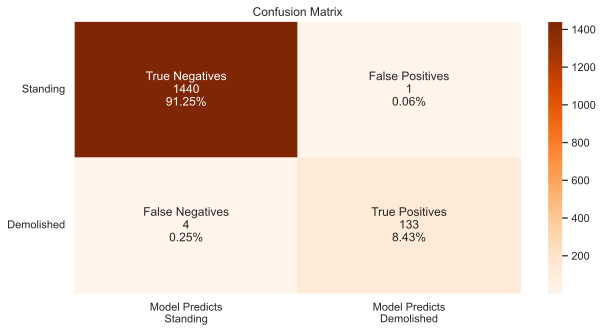

In [107]:
#confusion matrix
predictions = gboost.predict(X_test)
cf_matrix = confusion_matrix(y_test, predictions)

#labels for the inside of heatmap
name_list = ['True Negatives','False Positives','False Negatives','True Positives']
count_list = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
percentage_list = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

#put them next line
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(name_list,count_list,percentage_list)]

#in array 2,2 cos the heatmap will be 2,2
labels = np.asarray(labels).reshape(2,2)

# SETTING CLASS LABELS
yticklabels=['Standing','Demolished']
xticklabels=['Model Predicts\nStanding','Model Predicts\nDemolished']

# Set the default matplotlib figure size to 7x7:
fig, ax = plt.subplots(figsize=(10,5))

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
sns.set()
ax = sns.heatmap(cf_matrix, annot=labels, 
            xticklabels = xticklabels, yticklabels = yticklabels, 
            fmt='', cmap='Oranges');

# Resize the labels.
ax.set_title('Confusion Matrix', fontsize=12)
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=11, ha= 'center', rotation=0 )
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=11, va="center", rotation=0);

### 5.3.2 What did our model get wrong?

In [108]:
inspect_df = all_blocks.iloc[y_test.index.tolist()]
inspect_df["predictions"]=predictions.copy()
inspect_df[inspect_df["predictions"] != inspect_df["is_demolished"]].sort_values("street")

/Users/samuelhe/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,latest_survival_date,year_completed,blk_no,street,max_floor_lvl,bldg_contract_town,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,...,dist_to_airfield,airfield,height_score_2020,density_500m,units_per_floor,est_land_use,is_point_block,nearest_train_stn,dist_to_train_stn,dist_to_city_centre,latest_survival_year,age,predictions
292,2011-12-29,1973.0,168,boon lay dr,11,jw,109.0,0.0,0.0,106.0,0.0,3.0,0.0,...,4973,tengah air base,-4.32,25,9.909091,633.636364,0,LAKESIDE MRT STATION,830,16634,2011,38.0,0
30,1995-08-22,1952.0,7,boon tiong rd / tiong bahru rd,4,bm,24.0,0.0,0.0,24.0,0.0,0.0,0.0,...,11739,paya lebar air base,-4.49,90,6.000000,375.000000,0,TIONG BAHRU MRT STATION,701,2044,1995,43.0,0
18,1995-08-22,1952.0,12,boon tiong rd / tiong bahru rd,4,bm,24.0,0.0,0.0,24.0,0.0,0.0,0.0,...,11739,paya lebar air base,-4.49,90,6.000000,375.000000,0,TIONG BAHRU MRT STATION,701,2044,1995,43.0,0
709,2020-04-24,1986.0,11,jln bt merah,4,bm,21.0,0.0,0.0,21.0,0.0,0.0,0.0,...,12886,paya lebar air base,-14.88,64,5.250000,328.125000,0,TIONG BAHRU MRT STATION,685,2945,2020,34.0,1
386,2016-08-03,1979.0,516,west coast rd,2,cl,3.0,0.0,0.0,3.0,0.0,0.0,0.0,...,10473,tengah air base,-9.61,33,1.500000,93.750000,0,CLEMENTI MRT STATION,926,10472,2016,37.0,0


### Analysis of Wrong Predictions
It's not really easy to spot a trend from five wrong guesses. But let's try:

> **Low floors** - Out of the five blocks the model got wrong, four of them were short blocks. A possible remedy for this to get more data about a short block. Many of these blocks under 5 floors tend to also have retail features on the ground floor. If a block also serves a retail purpose, maybe it is more resilient against the wrecking ball. 


> **Bukit Merah** - Three of the blocks are from the Bukit Merah districts, which is surprising because our model would have had multiple nearby blocks to learn from as Bukit Merah is the *most demolished* public housing estate in Singapore.

### 5.Feature Importance

In [110]:
feat_df = pd.DataFrame(X_test.columns, columns=["features"])

feat_df["importance"] = gboost.feature_importances_

feat_df = feat_df.sort_values("importance", ascending=False).copy()

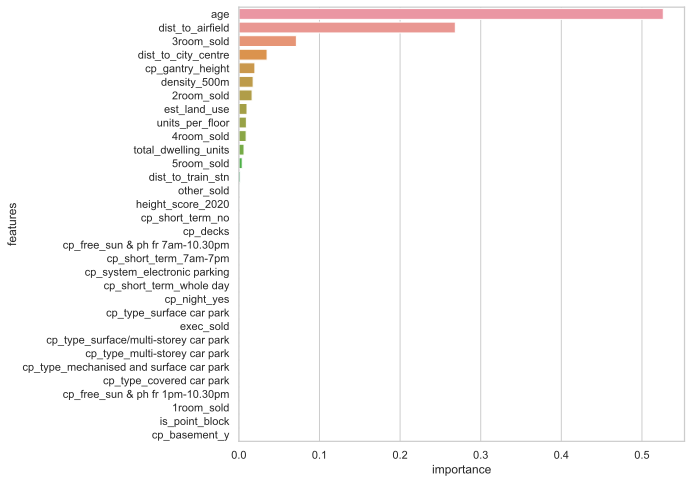

In [112]:
plt.figure(figsize=(8,8), dpi=250)

sns.set_style("whitegrid")
sns.barplot("importance", "features", data=feat_df);

In [144]:
# DESCRIBING THE AGES OF DEMOLISHED BLOCKS
blocks_pre1987.groupby("is_demolished").describe()["age"]

,count,mean,std,min,25%,50%,75%,max
is_demolished,,,,,,,,
0,4116.0,40.462585,7.215032,34.0,36.0,38.0,43.0,83.0
1,391.0,32.823529,12.108783,14.0,24.0,30.0,41.0,58.0


### Analysis of Important Features

> It's almost slightly worrying that the model is prioritising "age" as a overarchingly important feature (Importance score of more than 50%). One problem with this is that there were many blocks in our dataset that were much older than 30 years old and didn't get demolished. The model might learn(rather erroneously) that only blocks within 14-58 years old will get demolished. This will become a problem if we're trying to generalise the model on other datasets.


## 5.4 Unseen Data

In [122]:
#DEFINING OUR TARGET AND PREDICTORS
X = blocks_pre1987.drop('is_demolished',axis="columns")
y = blocks_pre1987['is_demolished']

# <<BOOTSTRAPPING TO OVERSAMPLE IMBALANCED CLASS>>
# CREATING A DF WITH X_train AND y_train
df = pd.concat([X, y], axis=1)
#count class
count_class_0, count_class_1 = df['is_demolished'].value_counts()
# DIVIDE THE DATASET INTO TWO CLASSES
df_class_0 = df[df['is_demolished'] == 0]
df_class_1 = df[df['is_demolished'] == 1]
# OVER-SAMPLING DEMOLISHED BLOCKS (CLASS 1)
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
# CREATING A NEW DF WITH A FATTENED CLASS 1
df_over = pd.concat([df_class_0, df_class_1_over], axis=0)
# REDEFINING X_train and y_train
X = df_over.drop(columns='is_demolished')
y = df_over.is_demolished

In [123]:
gboost = GradientBoostingClassifier(random_state=42,n_estimators=170,
                           min_samples_leaf=55, max_features='auto',
                           max_depth=15,learning_rate= 0.2444444444444444)
# WE WILL NOW ARM OUR MODEL WITH THE ENTIRE DATASET
gboost.fit(X, y)


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.2444444444444444, loss='deviance',
                           max_depth=15, max_features='auto',
                           max_leaf_nodes=None, min_impurity_decrease=0.0,
                           min_impurity_split=None, min_samples_leaf=55,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=170, n_iter_no_change=None,
                           presort='deprecated', random_state=42, subsample=1.0,
                           tol=0.0001, validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [124]:
# THIS CAN BE IMPROVED WITH A PAYA LEBAR AIRBASE SUBTRACTION 
def predict_demo(prediction_year):
    unseen_test = blocks_post1986.copy()
    unseen_test.age = unseen_test.age + (prediction_year-2020)
    unseen_test["predictions"] = gboost.predict(unseen_test)
    demo_index = unseen_test[unseen_test["predictions"]==1].index
    pd.set_option('display.max_columns', 36)
    print("PREDICTION YEAR: ", prediction_year)
    print("NUM OF DEMOLISHED BLOCKS: ", all_blocks.iloc[demo_index].shape[0])
    return all_blocks.iloc[demo_index]

In [126]:
predict_demo(prediction_year=2045).describe()

PREDICTION YEAR:  2045
NUM OF DEMOLISHED BLOCKS:  1225


,year_completed,max_floor_lvl,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,other_sold,is_demolished,latitude,longitude,cp_decks,cp_gantry_height,dist_to_airfield,height_score_2020,density_500m,units_per_floor,est_land_use,is_point_block,dist_to_train_stn,dist_to_city_centre,latest_survival_year,age
count,1225.000000,1225.000000,1225.000000,1225.0,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.0,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.0,1225.000000,1225.000000,1225.0,1225.000000
mean,2015.300408,18.624490,139.282449,0.0,14.224490,24.262857,59.081633,24.409796,0.001633,17.302041,0.0,1.385631,103.846114,8.678367,2.123959,4325.551837,3.084531,57.967347,7.813908,647.884004,0.0,678.756735,13740.863673,2020.0,4.699592
std,1.977705,7.010687,63.011724,0.0,32.429981,30.533751,41.218213,31.088088,0.040390,63.935094,0.0,0.039313,0.066780,4.821425,0.616928,2337.913765,6.117590,22.593934,3.464405,267.641579,0.0,438.424418,3405.883979,0.0,1.977705
min,2010.000000,8.000000,48.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.275327,103.692796,0.000000,0.000000,1638.000000,-9.270000,5.000000,2.863636,178.977273,0.0,39.000000,2401.000000,2020.0,1.000000
25%,2014.000000,15.000000,98.000000,0.0,0.000000,0.000000,32.000000,0.000000,0.000000,0.000000,0.0,1.358958,103.797220,6.000000,2.150000,3011.000000,0.110000,40.000000,5.647059,499.153846,0.0,311.000000,12641.000000,2020.0,3.000000
50%,2015.000000,16.000000,124.000000,0.0,0.000000,0.000000,56.000000,0.000000,0.000000,0.000000,0.0,1.392848,103.855238,10.000000,2.150000,3674.000000,1.000000,58.000000,7.384615,594.083333,0.0,583.000000,14432.000000,2020.0,5.000000
75%,2017.000000,19.000000,156.000000,0.0,0.000000,44.000000,78.000000,48.000000,0.000000,0.000000,0.0,1.410036,103.898485,13.000000,2.150000,4722.000000,2.930000,73.000000,8.590909,737.678571,0.0,963.000000,15386.000000,2020.0,6.000000
max,2019.000000,48.000000,584.000000,0.0,181.000000,160.000000,282.000000,164.000000,1.000000,510.000000,0.0,1.456235,103.960173,16.000000,5.400000,14744.000000,31.550000,134.000000,38.769231,3043.384615,0.0,2139.000000,19475.000000,2020.0,10.000000


In [137]:
predict_demo(prediction_year=2110)

PREDICTION YEAR:  2110
NUM OF DEMOLISHED BLOCKS:  0


,latest_survival_date,year_completed,blk_no,street,max_floor_lvl,bldg_contract_town,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,other_sold,is_demolished,latitude,longitude,cp_code,...,cp_free,cp_night,cp_decks,cp_gantry_height,cp_basement,geometry,dist_to_airfield,airfield,height_score_2020,density_500m,units_per_floor,est_land_use,is_point_block,nearest_train_stn,dist_to_train_stn,dist_to_city_centre,latest_survival_year,age


### Analysis of Very Wild Unseen Data Predictions
> The model isn't exactly generalising well at the moment. In 2045, it predicted that 1225 blocks will be demolished. And in the year 2110, it predicted that no blocks will get demolished. Even though many of the leases on our flats would have expired by then. 

> One problem is that the "age" column is the only feature shifting with our year. We should also be shifting height scores and density scores as Singapore progresses. Finding a way to shift these scores annual hat can be an area of improvement for us.

> One interesting thing that might happen is also the decommissioning of Paya Lebar Airbase in 2030, which will free up land for development and also release many of the blocks in eastern Singapore from its height limit restrictions.


## 5.5 Project Evaluation and Future Development.

> **Unique Dataset** - Through data cleaning and scraping and inference from multiple datasets, we've assembled a unique dataset with details of 391 demolished blocks(with some margin of error). This can benefit future research into demolished blocks in Singapore.

> **Improving Data Collection Accuracy** - We can definitely improve the accuracy of some of the details in the the dataset. In our cleaning and imputation processes, we've used too much inference and ended up cleaning specks of "dirty data" along the way.  One possible source of accurate information we can use is the property website EdgeProp, which seems to have quite a lot of details of demolished blocks stored in their archive(complete with photos for verification). Access to their API might definitely benefit the accuracy of the dataset. 

> **Near-Perfect Performance on Bootstrapped Gradient Boosting Classifier** - With our engineered features, our model has scored well on multiple metrics, with an impressive AUC-ROC score of 0.99. The model performed well even without being fed revealing features like Latitude-Longitude and Block Heights.

> **Why did the government choose these blocks?** - We set out to find out the reasons behind the picking of the 391 blocks for demolition. Our model revealed that the age of the block, it's distance to nearby airfields and the number of three-room flats sold are important factors. The eighth most important factor is the estimated land use for the block, a feature that we engineered. In future iterations of the project, we can try to build off this information and get more data related to these important features.

> **The need Generalise better** - One of the challenges with our data is that the types of flats and blocks change from generation to generation. So there might be a problem with our method of using a model trained on the blocks from the 1930s-1980s, and applying it to blocks from 1980s-present.  For example a *3-Room Standard (1960-1970)* is about 50-55 sqm in size but a *3-Room Model A* (2002-present) measures about 60-65 sqm. Although there is a difference of about about 10 sqm, this appears in our dataset as the same feature. Maybe a time-series model might work much better for an unseen data set that is from the future. 